In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

import lightgbm as lgbm
#https://lightgbm.readthedocs.io/en/latest/

import pandas as pd
import numpy as np

In [2]:
#Set options to allow all columns to be shown with a call to .head()
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Import Data

In [3]:
numerai = pd.read_csv("numerai_datasets/numerai_training_data.csv")

In [4]:
numerai.head()

,id,era,data_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,target_bernie,target_elizabeth,target_jordan,target_ken,target_charles,target_frank,target_hillary
0,n0003126ff2349f6,era1,train,0.54836,0.31077,0.37524,0.49490,0.53217,0.48388,0.50220,0.59506,0.55422,0.48578,0.59966,0.45133,0.46165,0.58824,0.47648,0.54185,0.53035,0.52805,0.62023,0.54217,0.70297,0.69448,0.46862,0.51515,0.44668,0.53039,0.58756,0.36058,0.41920,0.46516,0.53498,0.63175,0.53577,0.36623,0.37073,0.54078,0.58522,0.64636,0.60431,0.42239,0.67937,0.32205,0.53407,0.46254,0.56658,0.46022,0.63760,0.55239,0.64054,0.52182,1,1,1,1,1,1,1
1,n003d773d29b57ec,era1,train,0.34712,0.40275,0.42747,0.44006,0.47866,0.44055,0.59182,0.68856,0.56543,0.57715,0.57795,0.55753,0.48289,0.46031,0.50983,0.41775,0.51362,0.49862,0.39821,0.61058,0.49282,0.58034,0.52376,0.41882,0.62424,0.50778,0.29379,0.50027,0.45552,0.35620,0.49544,0.35277,0.59167,0.52869,0.65674,0.47519,0.60547,0.56362,0.38146,0.58835,0.65277,0.46215,0.48303,0.35919,0.58709,0.55369,0.64628,0.46029,0.62941,0.55010,1,1,1,1,1,1,1
2,n0074df2dc6810b6,era1,train,0.50871,0.48639,0.47544,0.40306,0.53436,0.64028,0.51420,0.63232,0.62101,0.48065,0.54203,0.55304,0.72525,0.57408,0.49368,0.41108,0.42165,0.41740,0.49350,0.41937,0.58758,0.40735,0.54397,0.49110,0.46319,0.47559,0.53655,0.33736,0.35971,0.57398,0.36414,0.44651,0.50714,0.53124,0.38978,0.54079,0.51058,0.54912,0.44611,0.41032,0.49190,0.50243,0.51624,0.48028,0.73195,0.42444,0.43228,0.40596,0.54731,0.39061,0,0,1,0,0,0,0
3,n0090630f530903e,era1,train,0.61363,0.40268,0.53779,0.37045,0.58711,0.59900,0.62428,0.73602,0.43887,0.28383,0.49202,0.54222,0.70992,0.26707,0.72053,0.54136,0.51821,0.56212,0.46081,0.62571,0.32497,0.64330,0.39063,0.32134,0.45451,0.58448,0.40316,0.51858,0.48830,0.45194,0.20134,0.50705,0.38831,0.35573,0.52929,0.52327,0.48866,0.42828,0.50020,0.37528,0.54360,0.54347,0.46995,0.60385,0.56471,0.51203,0.35597,0.53878,0.47776,0.36835,0,0,0,0,0,0,0
4,n00af19089546fe9,era1,train,0.30704,0.47273,0.54495,0.48692,0.47348,0.34695,0.41506,0.61225,0.56853,0.44104,0.45416,0.50839,0.40957,0.67414,0.45356,0.59333,0.50526,0.15084,0.40621,0.39427,0.66767,0.41428,0.52894,0.57846,0.58134,0.49488,0.56870,0.62991,0.45221,0.48362,0.71259,0.39272,0.70319,0.62108,0.49073,0.50437,0.36032,0.47219,0.46962,0.30812,0.71654,0.54050,0.39448,0.29495,0.61935,0.45651,0.53768,0.46431,0.49482,0.60452,1,1,1,1,1,1,1


In [5]:
numerai.shape

(502732, 60)

In [6]:
target = numerai["target_charles"]

full_df = numerai.drop(["id", "era", "data_type", "target_bernie", "target_elizabeth","target_jordan", "target_ken",
                        "target_charles", "target_frank", "target_hillary"], axis=1)

# Split into training and testing data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(full_df, target, test_size = 0.20, random_state = False)

train_data = lgbm.Dataset(X_train, y_train)
test_data = lgbm.Dataset(X_test, y_test)

Values were found using bayesian hyperparameter optimization
https://github.com/fmfn/BayesianOptimization

In [14]:
params = {'learning_rate': 0.09688493961361067,
          'num_leaves': 14.65108244709076,
          'feature_fraction': 0.7217156120052185,
          'max_depth': 3.026492415177267,
          'metric' : 'auc'}

params['num_leaves'] = int(params['num_leaves'])
params['max_depth'] = int(params['max_depth'])

In [18]:
num_rounds = 5000
model = lgbm.train(params, train_data, num_boost_round=num_rounds, valid_sets=[test_data], early_stopping_rounds=50)

[1]	valid_0's auc: 0.510074
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.510732
[3]	valid_0's auc: 0.51317
[4]	valid_0's auc: 0.514776
[5]	valid_0's auc: 0.515284
[6]	valid_0's auc: 0.515961
[7]	valid_0's auc: 0.516022
[8]	valid_0's auc: 0.516368
[9]	valid_0's auc: 0.516839
[10]	valid_0's auc: 0.516875
[11]	valid_0's auc: 0.517051
[12]	valid_0's auc: 0.51715
[13]	valid_0's auc: 0.517231
[14]	valid_0's auc: 0.517321
[15]	valid_0's auc: 0.517393
[16]	valid_0's auc: 0.517475
[17]	valid_0's auc: 0.5175
[18]	valid_0's auc: 0.517433
[19]	valid_0's auc: 0.517354
[20]	valid_0's auc: 0.517339
[21]	valid_0's auc: 0.517493
[22]	valid_0's auc: 0.517539
[23]	valid_0's auc: 0.517542
[24]	valid_0's auc: 0.517804
[25]	valid_0's auc: 0.517863
[26]	valid_0's auc: 0.518001
[27]	valid_0's auc: 0.518108
[28]	valid_0's auc: 0.518172
[29]	valid_0's auc: 0.51811
[30]	valid_0's auc: 0.518243
[31]	valid_0's auc: 0.518256
[32]	valid_0's auc: 0.518342
[33]	valid_0's auc: 0.51

In [19]:
preds = model.predict(X_test)

In [20]:
print(roc_auc_score(y_test, preds))

0.5196213906718967


In [21]:
full_lgb = lgbm.Dataset(full_df, label=target)
model = lgbm.train(params, full_lgb, num_boost_round=81)

In [23]:
#model.save_model('lgbm_example.txt')

# Predict Tournment Data

In [24]:
#model = lgbm.Booster(model_file='lgbm_example.txt')

In [25]:
tourn = pd.read_csv("numerai_datasets/numerai_tournament_data.csv")

In [26]:
ids = tourn['id']
tourn = tourn.drop(["id", "era", "data_type", "target_bernie", "target_elizabeth","target_jordan", "target_ken",
                        "target_charles", "target_frank", "target_hillary"], axis=1)

In [27]:
prediction = model.predict(tourn)

In [28]:
results_df = pd.DataFrame(data={'probability_charles':results})
joined = pd.DataFrame(ids).join(results_df)

print("Writing predictions to predictions.csv")

joined.to_csv("charles_lgbm_example.csv", index=False)

Writing predictions to predictions.csv


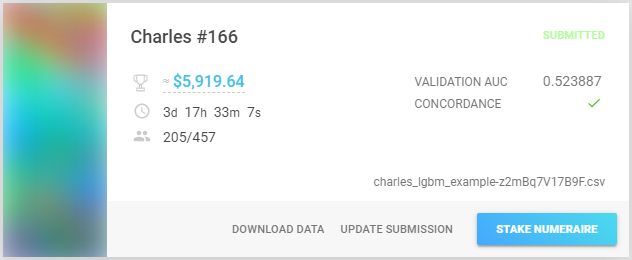

In [29]:
from IPython.display import Image
Image("charles.png")